In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [2]:
data_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
data_df.head(15)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test_df.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_df.shape

(42000, 785)

In [6]:
y=data_df['label']
x=data_df.drop('label',axis=1)

In [7]:
x_for_test_data=test_df[:]

In [8]:
type(x)

pandas.core.frame.DataFrame

3


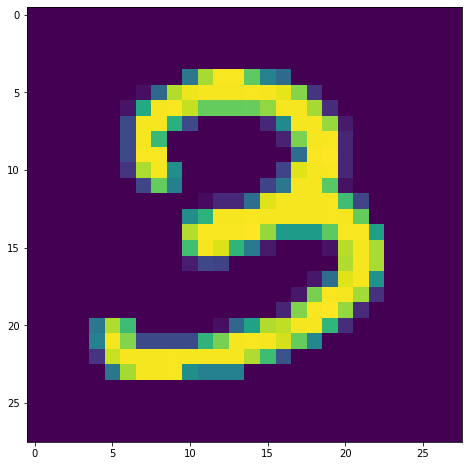

In [9]:
plt.figure(figsize=(8,8))
some_digit=14
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

<AxesSubplot:xlabel='label', ylabel='count'>

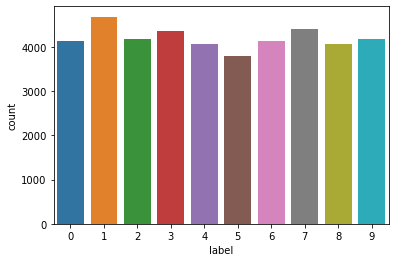

In [10]:
sns.countplot( x='label', data=data_df) 

In [11]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [12]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

In [13]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train,y_train)
#x_train = scaler.transform(x_train)
#x_train.shape

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [15]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 2, 4, 7], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))

0.957936507936508


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1236
           1       0.93      1.00      0.96      1370
           2       0.98      0.94      0.96      1252
           3       0.96      0.95      0.96      1369
           4       0.97      0.95      0.96      1215
           5       0.96      0.95      0.95      1132
           6       0.97      0.99      0.98      1216
           7       0.94      0.96      0.95      1326
           8       0.99      0.91      0.95      1197
           9       0.92      0.93      0.93      1287

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [26]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [27]:
y_pred_on_test_data[4]

3

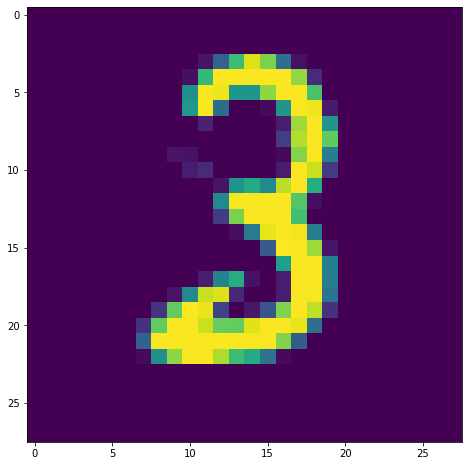

In [31]:
plt.figure(figsize=(8,8))
some_digit=4
some_digit_image = x_for_test_data.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))


In [28]:
y_pred_on_test_data[6]

0

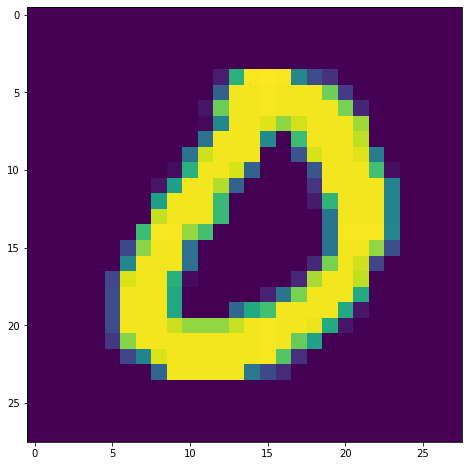

In [30]:
plt.figure(figsize=(8,8))
some_digit=6
some_digit_image = x_for_test_data.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))

In [36]:
y_pred_on_test_data[11]

7

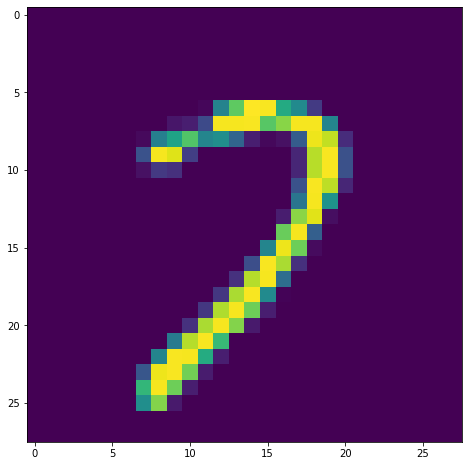

In [37]:
plt.figure(figsize=(8,8))
some_digit=11
some_digit_image = x_for_test_data.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))

In [38]:
y_pred_on_test_data[25]

4

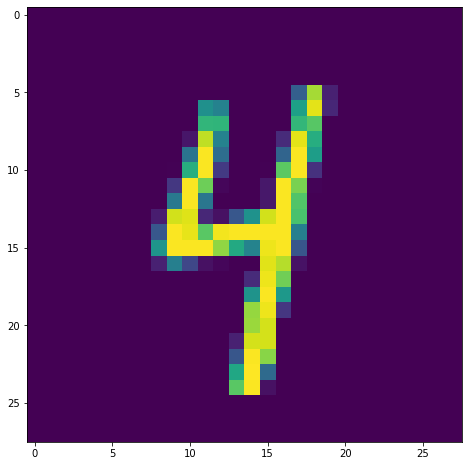

In [39]:
plt.figure(figsize=(8,8))
some_digit=25
some_digit_image = x_for_test_data.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))

In [41]:
y_pred_on_test_data[35]

2

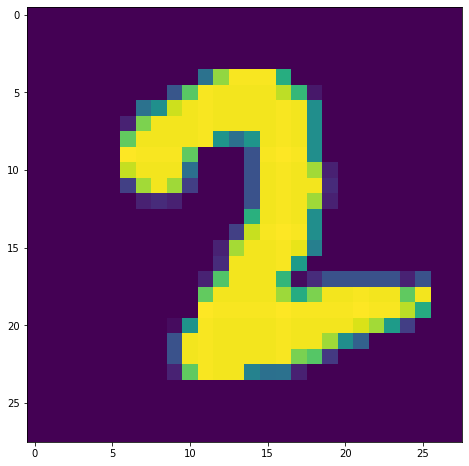

In [43]:
plt.figure(figsize=(8,8))
some_digit=35
some_digit_image = x_for_test_data.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))